In [56]:
import pandas as pd

In [57]:
# Load the dataset
file_path = "drsi.csv"
df = pd.read_csv(file_path)

In [58]:
# Remove rows from 2 to 192 (zero-based index 1 to 191)
df_cleaned = df.iloc[192:].reset_index(drop=True)

# Rename "Title" column to "Date"
df_cleaned.rename(columns={"Title": "Date"}, inplace=True)

df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], format="%Y %b", errors="coerce")

In [59]:
# Manually specify the columns to keep
columns_to_keep = [
    "Date",  # Assuming this is the Date column. Change if necessary.

    # Technology
    "RSI:Retail of computer and telecomms equipment (val sa):All Business Index",

    # Food
    "RSI:Predominantly food stores (val sa):All Business Index",

    # Cosmetic
    "RSI:Retail cosmetic & toilet articles (val sa):All Business Index",

    # Clothing
    "RSI:Retail sale of clothing (val sa):All Business Index",
]

In [60]:
# Check which of the selected columns actually exist in the dataset
existing_columns = [col for col in columns_to_keep if col in df_cleaned.columns]

# Keep only selected columns
df_cleaned = df_cleaned[existing_columns]

In [61]:
# Print first few rows to verify
print(df_cleaned.head())

        Date  \
0 1988-02-01   
1 1988-03-01   
2 1988-04-01   
3 1988-05-01   
4 1988-06-01   

  RSI:Retail of computer and telecomms equipment (val sa):All Business Index  \
0                                               84.2                           
1                                               81.8                           
2                                               86.0                           
3                                               88.1                           
4                                               89.0                           

  RSI:Predominantly food stores (val sa):All Business Index  \
0                                               25.2          
1                                               25.3          
2                                               25.5          
3                                               25.4          
4                                               25.6          

  RSI:Retail cosmetic & toilet articles (va

In [62]:
# Save the cleaned dataset
cleaned_file_path = "cleaned_drsi.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

In [63]:
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to cleaned_drsi.csv


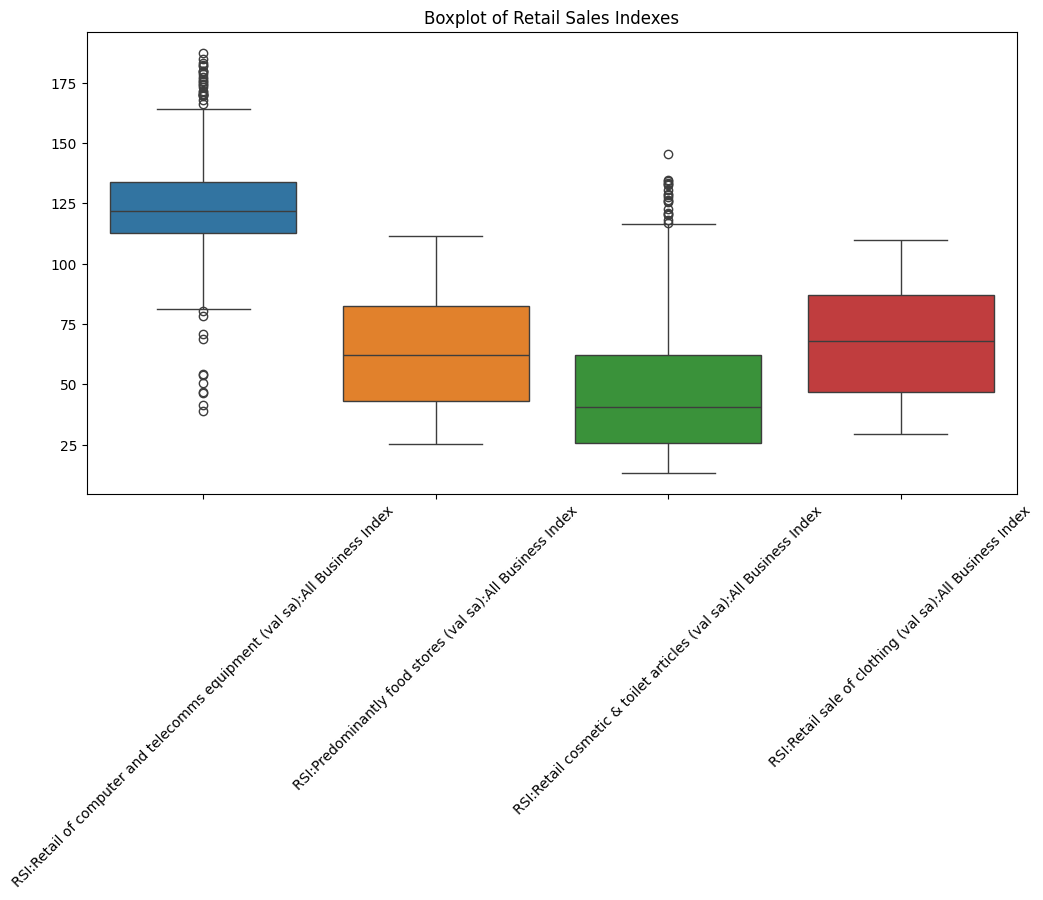

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "cleaned_drsi.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Boxplot to analyze distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Retail Sales Indexes")
plt.xticks(rotation=45)
plt.show()


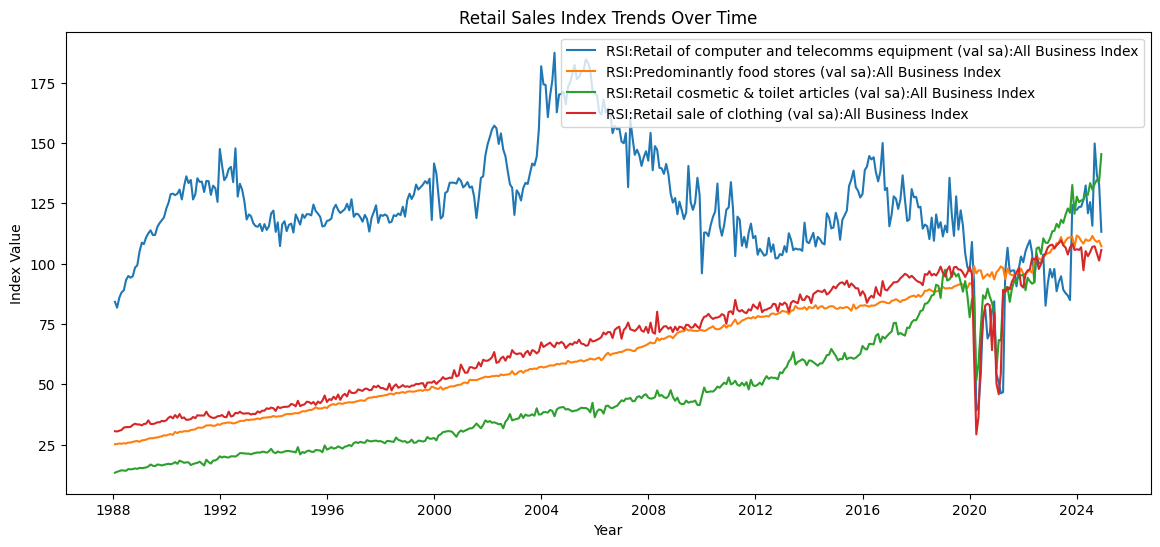

In [65]:

# Time series visualization
plt.figure(figsize=(14, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title("Retail Sales Index Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend()
plt.show()


<Figure size 1000x800 with 0 Axes>

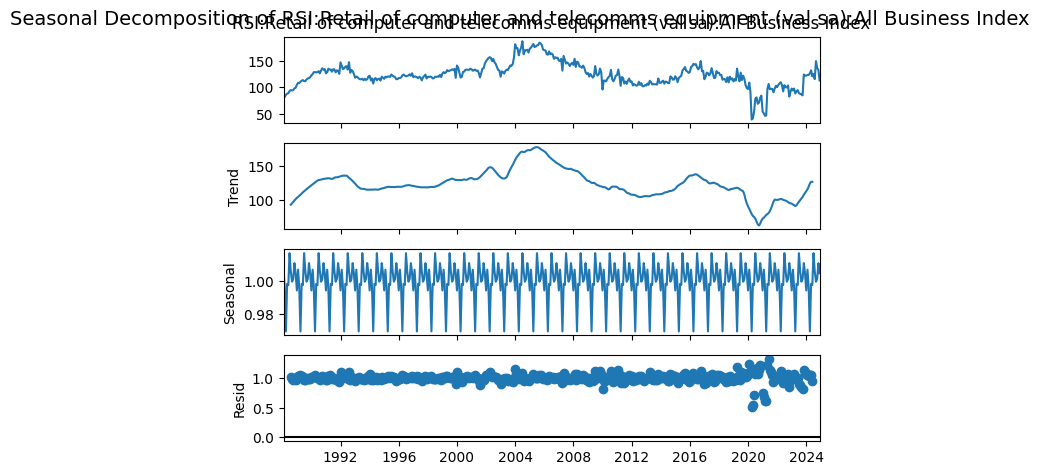

<Figure size 1000x800 with 0 Axes>

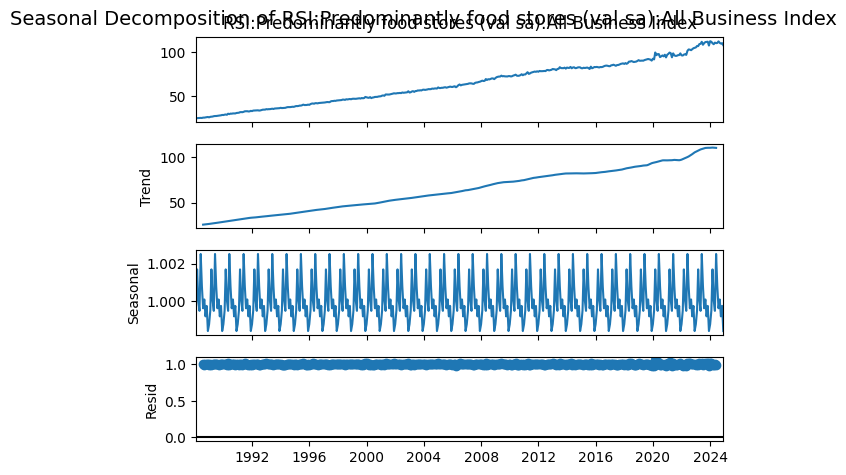

<Figure size 1000x800 with 0 Axes>

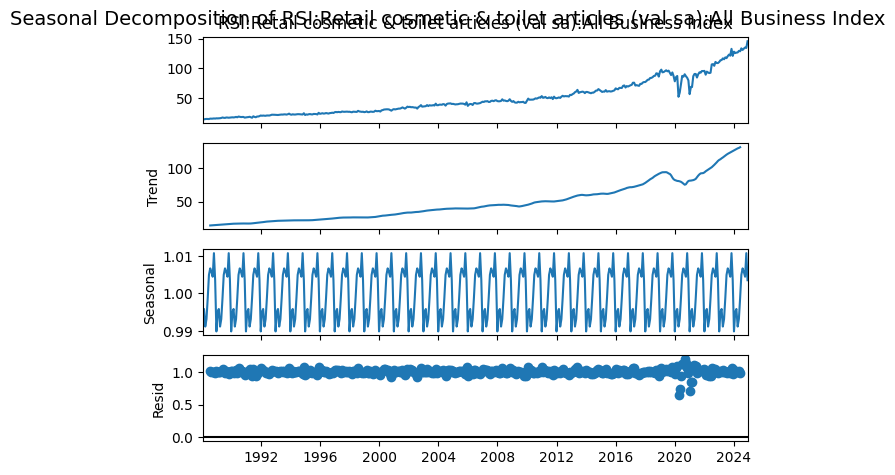

<Figure size 1000x800 with 0 Axes>

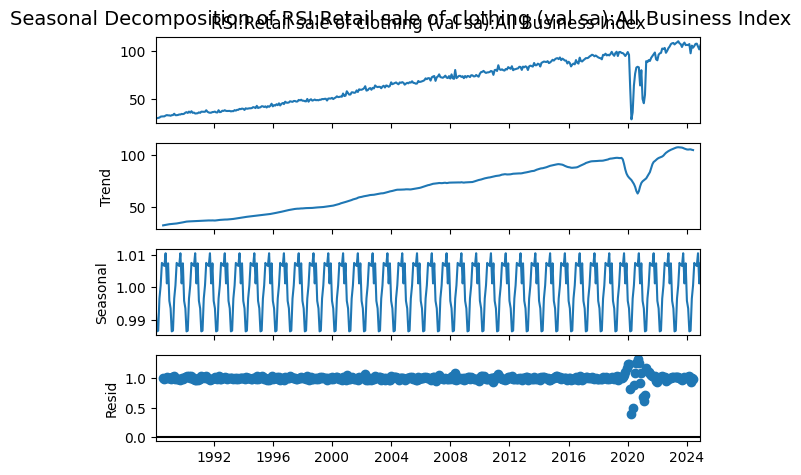

In [66]:

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='multiplicative', period=12)
    
    plt.figure(figsize=(10, 8))
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=14)
    plt.show()


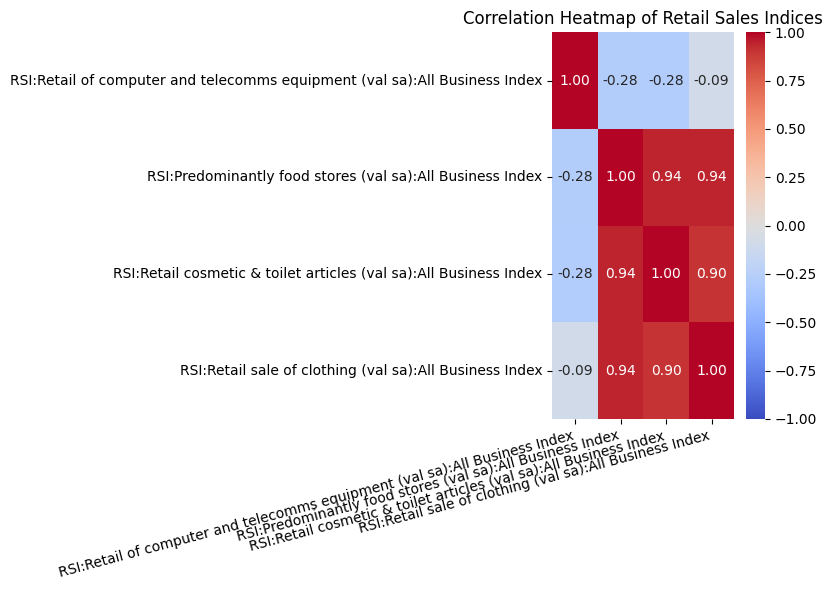

In [70]:
import seaborn as sns

plt.figure(figsize=(8, 6))
# Compute correlation only for the index columns (exclude 'Date')
corr = df_cleaned.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Retail Sales Indices')
plt.xticks(rotation=15, ha='right')  # Rotate for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

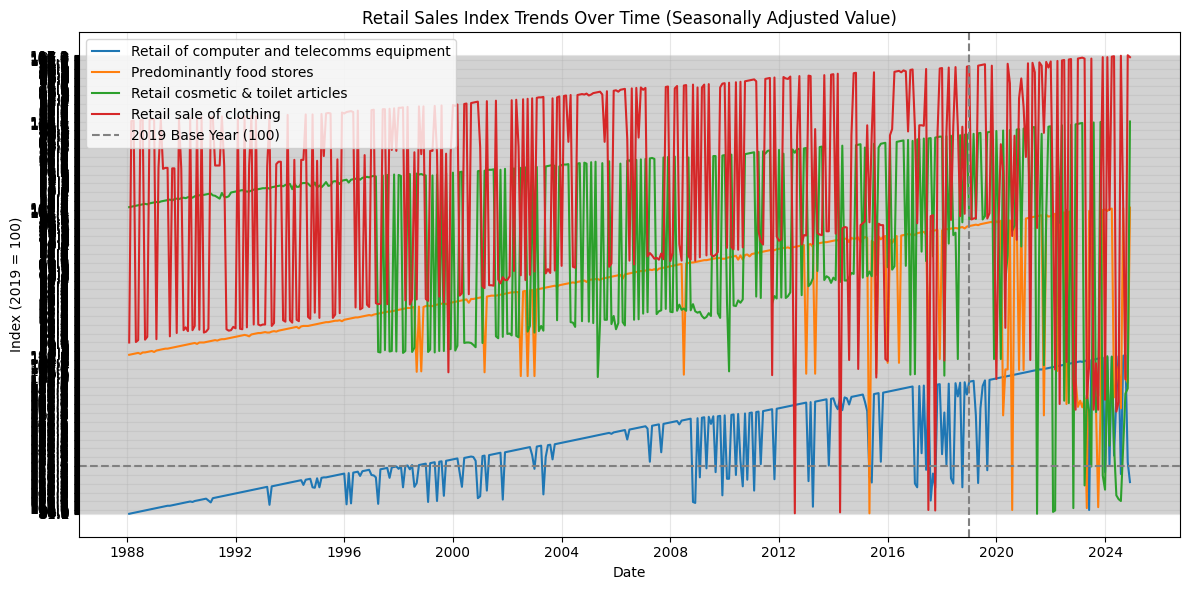

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cleaned is your cleaned DataFrame
plt.figure(figsize=(12, 6))
for column in df_cleaned.columns[1:]:  # Skip 'Date' column
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=column.split(':')[1].split(' (')[0])  # Simplified label

# Add base year reference line
plt.axhline(y=100, color='gray', linestyle='--', label='2019 Base Year (100)')
plt.axvline(pd.to_datetime('2019-01-01'), color='gray', linestyle='--')

plt.title('Retail Sales Index Trends Over Time (Seasonally Adjusted Value)')
plt.xlabel('Date')
plt.ylabel('Index (2019 = 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

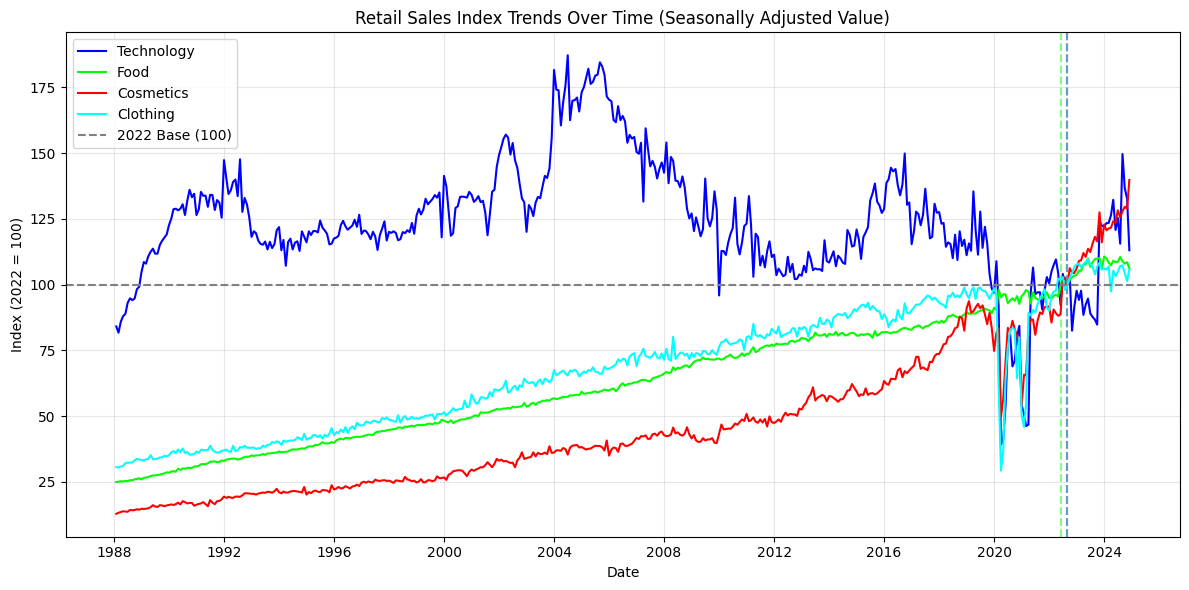

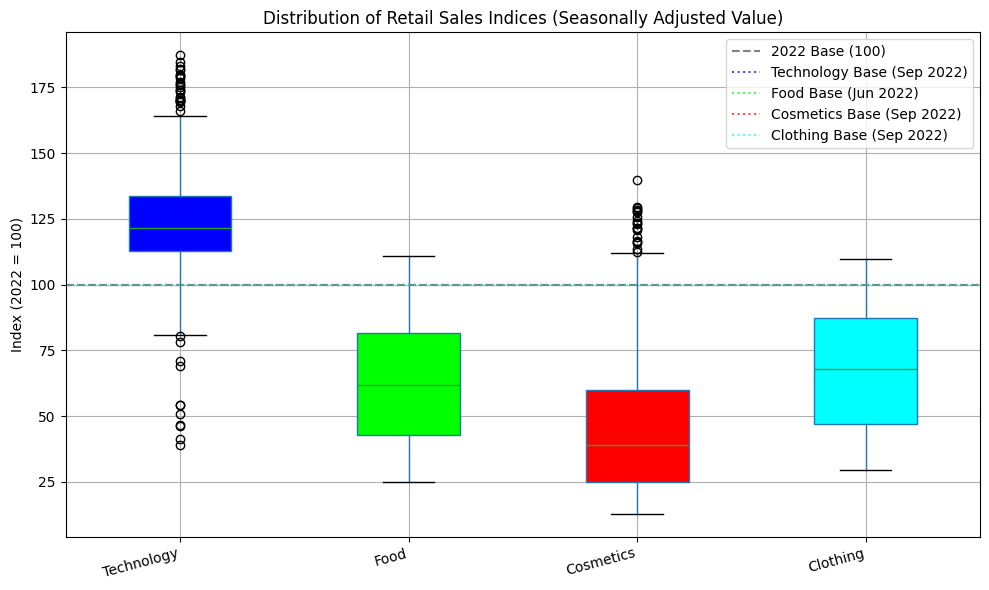

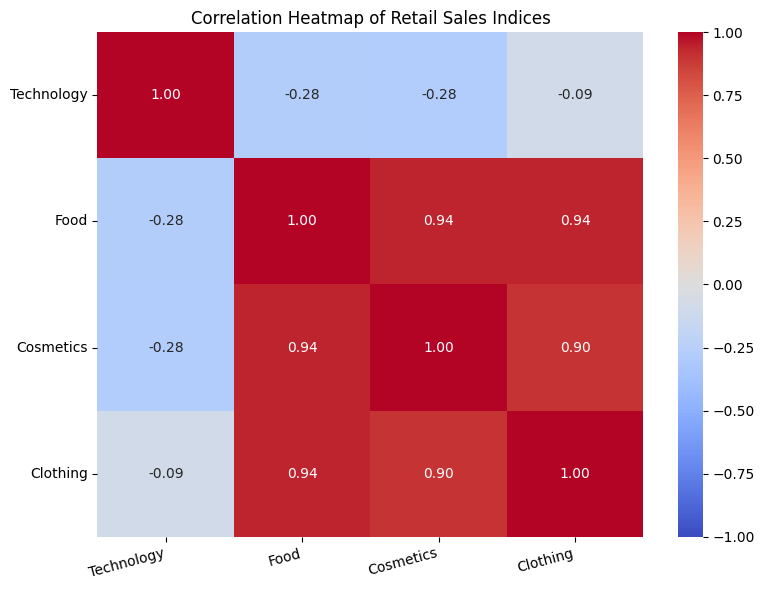

<Figure size 1200x800 with 0 Axes>

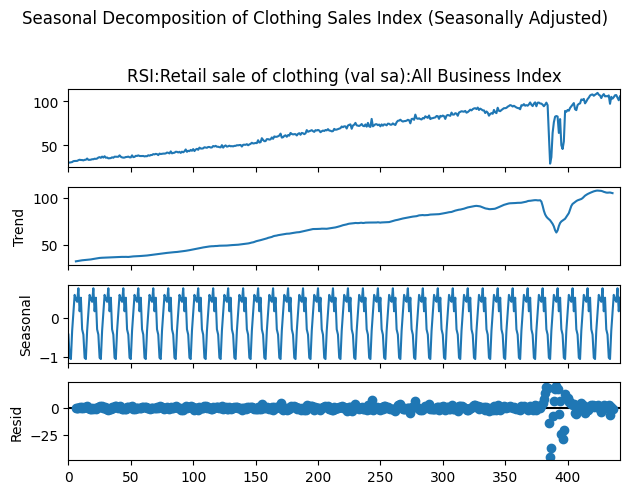

Base Months in 2022 for Each Sector:
Technology: 2022-09
Food: 2022-06
Cosmetics: 2022-09
Clothing: 2022-09


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and verify your cleaned data
df_cleaned = pd.read_csv('cleaned_drsi.csv')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Define short sector names
sector_names = {
    'RSI:Retail of computer and telecomms equipment (val sa):All Business Index': 'Technology',
    'RSI:Predominantly food stores (val sa):All Business Index': 'Food',
    'RSI:Retail cosmetic & toilet articles (val sa):All Business Index': 'Cosmetics',
    'RSI:Retail sale of clothing (val sa):All Business Index': 'Clothing'
}

# Find the base month in 2022 for each sector (closest to 100) and rebase
base_months = {}
base_values = {}
df_2022 = df_cleaned[df_cleaned['Date'].dt.year == 2022].copy()
for column in df_cleaned.columns[1:]:
    base_row = df_2022.loc[(df_2022[column] - 100).abs().idxmin()]
    base_months[column] = base_row['Date']
    base_values[column] = base_row[column]
    df_cleaned[column] = (df_cleaned[column] / base_values[column]) * 100

# Define colors with transparency for consistency (RGBA: R, G, B, Alpha)
colors = [
    (0, 0, 1, 1),  # Blue for Technology (full opacity for lines)
    (0, 1, 0, 1),  # Green for Food
    (1, 0, 0, 1),  # Red for Cosmetics
    (0, 1, 1, 1)   # Cyan for Clothing
]
fill_colors = [
    (0, 0, 1, 0.3),  # Light blue for Technology (30% opacity for boxes)
    (0, 1, 0, 0.3),  # Light green for Food
    (1, 0, 0, 0.3),  # Light red for Cosmetics
    (0, 1, 1, 0.3)   # Light cyan for Clothing
]

# 1. Line Plot: Trends Over Time with Individual Base Months
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_cleaned.columns[1:]):
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=sector_names[column], color=colors[i])
    plt.axvline(base_months[column], color=colors[i], linestyle='--', alpha=0.5)
plt.axhline(y=100, color='gray', linestyle='--', label='2022 Base (100)')
plt.title('Retail Sales Index Trends Over Time (Seasonally Adjusted Value)')
plt.xlabel('Date')
plt.ylabel('Index (2022 = 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Box Plot: Distribution with Base Month Reference
plt.figure(figsize=(10, 6))
box = df_cleaned.rename(columns=sector_names).iloc[:, 1:].boxplot(patch_artist=True, return_type='dict')
plt.title('Distribution of Retail Sales Indices (Seasonally Adjusted Value)')
plt.ylabel('Index (2022 = 100)')
plt.xticks(rotation=15, ha='right')
plt.axhline(y=100, color='gray', linestyle='--', label='2022 Base (100)')

# Color boxes and add base month horizontal lines
for i, column in enumerate(df_cleaned.columns[1:]):
    box['boxes'][i].set_facecolor(fill_colors[i])  # Use RGBA with transparency
    base_value_rebased = 100  # After rebasing, base month value is 100
    plt.axhline(y=base_value_rebased, color=colors[i], linestyle=':', alpha=0.7, 
                label=f'{sector_names[column]} Base ({base_months[column].strftime("%b %Y")})')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_cleaned.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            xticklabels=sector_names.values(), yticklabels=sector_names.values())
plt.title('Correlation Heatmap of Retail Sales Indices')
plt.xticks(rotation=15, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Seasonal Decomposition (Optional, for Clothing as an example)
plt.figure(figsize=(12, 8))
decomp = seasonal_decompose(df_cleaned['RSI:Retail sale of clothing (val sa):All Business Index'], 
                            model='additive', period=12)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Clothing Sales Index (Seasonally Adjusted)', y=1.02)
plt.tight_layout()
plt.show()

# Print base months for reference
print("Base Months in 2022 for Each Sector:")
for column, base_date in base_months.items():
    print(f"{sector_names[column]}: {base_date.strftime('%Y-%m')}")

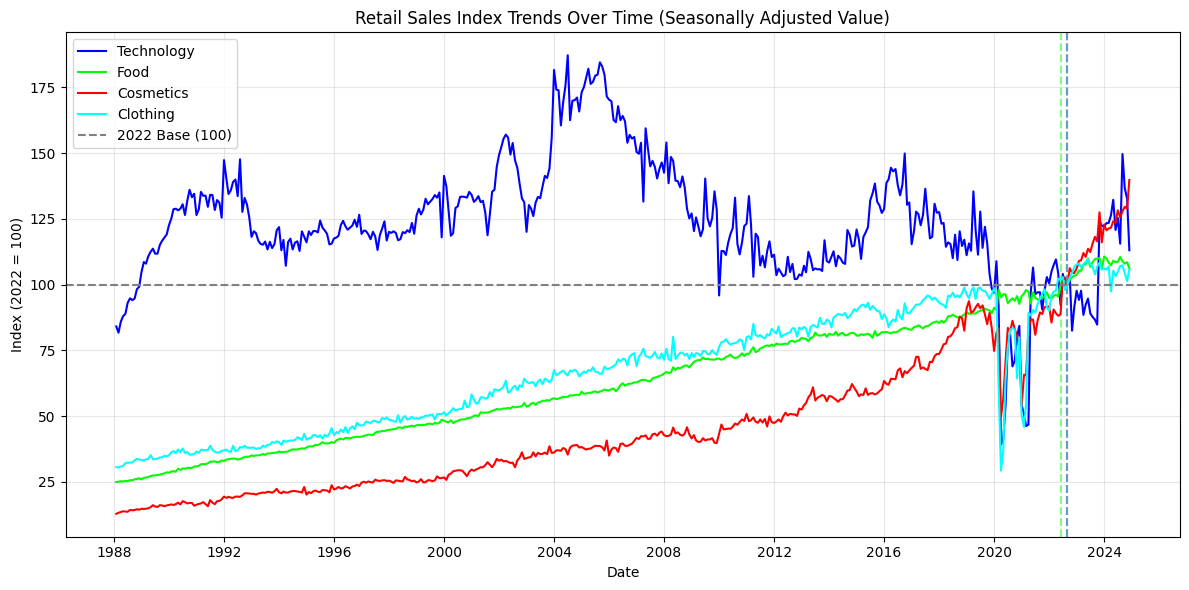

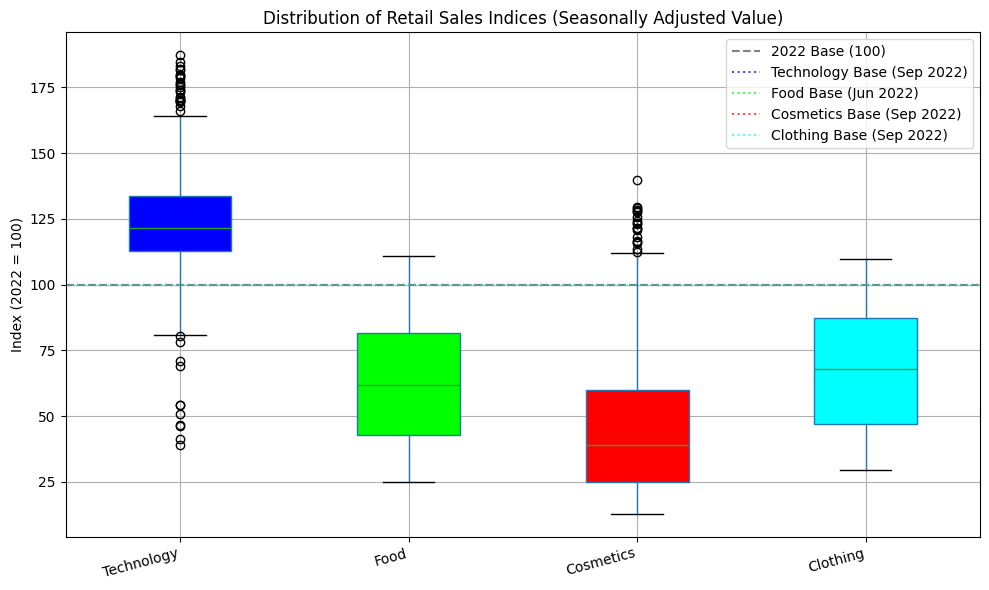

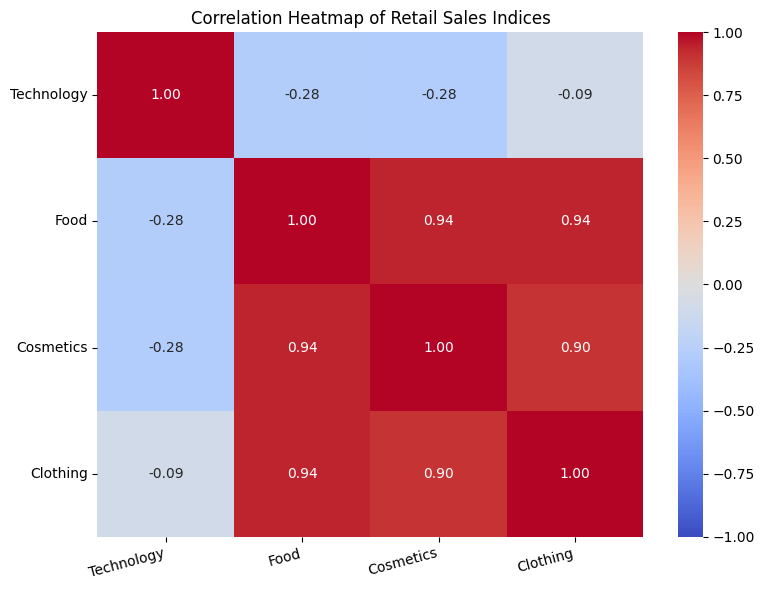

<Figure size 1200x800 with 0 Axes>

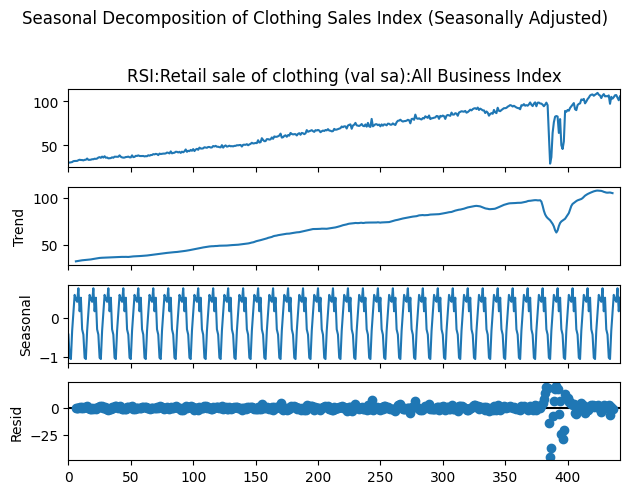

Base Months in 2022 for Each Sector:
Technology: 2022-09
Food: 2022-06
Cosmetics: 2022-09
Clothing: 2022-09


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and verify your cleaned data
df_cleaned = pd.read_csv('cleaned_drsi.csv')
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Define short sector names
sector_names = {
    'RSI:Retail of computer and telecomms equipment (val sa):All Business Index': 'Technology',
    'RSI:Predominantly food stores (val sa):All Business Index': 'Food',
    'RSI:Retail cosmetic & toilet articles (val sa):All Business Index': 'Cosmetics',
    'RSI:Retail sale of clothing (val sa):All Business Index': 'Clothing'
}

# Find the base month in 2022 for each sector (closest to 100) and rebase
base_months = {}
base_values = {}
df_2022 = df_cleaned[df_cleaned['Date'].dt.year == 2022].copy()
for column in df_cleaned.columns[1:]:
    base_row = df_2022.loc[(df_2022[column] - 100).abs().idxmin()]
    base_months[column] = base_row['Date']
    base_values[column] = base_row[column]
    df_cleaned[column] = (df_cleaned[column] / base_values[column]) * 100

# Define colors with transparency for consistency (RGBA: R, G, B, Alpha)
colors = [
    (0, 0, 1, 1),  # Blue for Technology
    (0, 1, 0, 1),  # Green for Food
    (1, 0, 0, 1),  # Red for Cosmetics
    (0, 1, 1, 1)   # Cyan for Clothing
]
fill_colors = [
    (0, 0, 1, 0.3),  # Light blue for Technology
    (0, 1, 0, 0.3),  # Light green for Food
    (1, 0, 0, 0.3),  # Light red for Cosmetics
    (0, 1, 1, 0.3)   # Light cyan for Clothing
]

# 1. Line Plot: Trends Over Time with Individual Base Months
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_cleaned.columns[1:]):
    plt.plot(df_cleaned['Date'], df_cleaned[column], label=sector_names[column], color=colors[i])
    plt.axvline(base_months[column], color=colors[i], linestyle='--', alpha=0.5)
plt.axhline(y=100, color='gray', linestyle='--', label='2022 Base (100)')
plt.title('Retail Sales Index Trends Over Time (Seasonally Adjusted Value)')
plt.xlabel('Date')
plt.ylabel('Index (2022 = 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('line_plot_trends.png', dpi=300, bbox_inches='tight')  # Export as PNG
plt.show()

# 2. Box Plot: Distribution with Base Month Reference
plt.figure(figsize=(10, 6))
box = df_cleaned.rename(columns=sector_names).iloc[:, 1:].boxplot(patch_artist=True, return_type='dict')
plt.title('Distribution of Retail Sales Indices (Seasonally Adjusted Value)')
plt.ylabel('Index (2022 = 100)')
plt.xticks(rotation=15, ha='right')
plt.axhline(y=100, color='gray', linestyle='--', label='2022 Base (100)')
for i, column in enumerate(df_cleaned.columns[1:]):
    box['boxes'][i].set_facecolor(fill_colors[i])
    base_value_rebased = 100
    plt.axhline(y=base_value_rebased, color=colors[i], linestyle=':', alpha=0.7, 
                label=f'{sector_names[column]} Base ({base_months[column].strftime("%b %Y")})')
plt.legend()
plt.tight_layout()
plt.savefig('box_plot_distribution.png', dpi=300, bbox_inches='tight')  # Export as PNG
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_cleaned.iloc[:, 1:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0,
            xticklabels=sector_names.values(), yticklabels=sector_names.values())
plt.title('Correlation Heatmap of Retail Sales Indices')
plt.xticks(rotation=15, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('heatmap_correlation.png', dpi=300, bbox_inches='tight')  # Export as PNG
plt.show()

# 4. Seasonal Decomposition (Optional, for Clothing as an example)
plt.figure(figsize=(12, 8))
decomp = seasonal_decompose(df_cleaned['RSI:Retail sale of clothing (val sa):All Business Index'], 
                            model='additive', period=12)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Clothing Sales Index (Seasonally Adjusted)', y=1.02)
plt.tight_layout()
plt.savefig('decomposition_clothing.png', dpi=300, bbox_inches='tight')  # Export as PNG
plt.show()

# Print base months for reference
print("Base Months in 2022 for Each Sector:")
for column, base_date in base_months.items():
    print(f"{sector_names[column]}: {base_date.strftime('%Y-%m')}")